<a href="https://colab.research.google.com/github/ericxu88/mnist-classification/blob/main/mnist_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
gpus = tf.config.list_physical_devices('GPU')
print("GPUs detected:", gpus)



GPUs detected: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [2]:
from tensorflow.keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
print("Training data:", x_train.shape, "labels:", y_train.shape)
print("Test data: ", x_test.shape, "labels:", y_test.shape)

Training data: (60000, 28, 28) labels: (60000,)
Test data:  (10000, 28, 28) labels: (10000,)


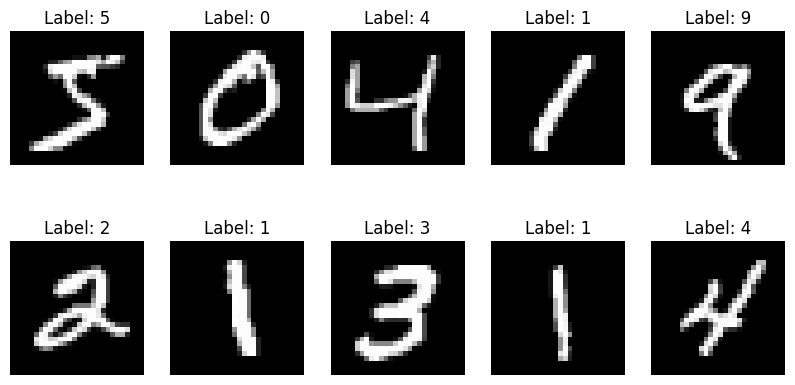

In [3]:
#mnist input details
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
for i in range(10):
  plt.subplot(2,5,i+1)
  plt.imshow(x_train[i], cmap='gray')
  plt.title(f"Label: {y_train[i]}")
  plt.axis('off')
plt.show()

In [4]:
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

print('After reshape dimensions: ')
print("x_train:", x_train.shape)
print("x_test:", x_test.shape)

After reshape dimensions: 
x_train: (60000, 28, 28, 1)
x_test: (10000, 28, 28, 1)


In [5]:
#normalize
x_train = x_train / 255
x_test = x_test / 255

print(x_train.min(), x_train.max())
print(x_test.min(), x_test.max())

0.0 1.0
0.0 1.0


In [6]:
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

print(y_train.shape)
print(y_test.shape)
print(y_train[0])


(60000, 10)
(10000, 10)
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [7]:
#baseline model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense

baseline_model = Sequential([
  Flatten(input_shape=(28, 28, 1)),
  Dense(128, activation='relu'),
  Dense(10, activation='softmax')
])

baseline_model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

In [8]:
baseline_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [9]:
history = baseline_model.fit(
    x_train, y_train,
    epochs=5,
    batch_size=128,
    validation_split=0.1,
    verbose=2
)

Epoch 1/5
422/422 - 5s - 11ms/step - accuracy: 0.8970 - loss: 0.3760 - val_accuracy: 0.9555 - val_loss: 0.1696
Epoch 2/5
422/422 - 1s - 3ms/step - accuracy: 0.9514 - loss: 0.1703 - val_accuracy: 0.9663 - val_loss: 0.1258
Epoch 3/5
422/422 - 1s - 3ms/step - accuracy: 0.9646 - loss: 0.1236 - val_accuracy: 0.9713 - val_loss: 0.1043
Epoch 4/5
422/422 - 1s - 3ms/step - accuracy: 0.9728 - loss: 0.0963 - val_accuracy: 0.9742 - val_loss: 0.0949
Epoch 5/5
422/422 - 1s - 3ms/step - accuracy: 0.9782 - loss: 0.0780 - val_accuracy: 0.9755 - val_loss: 0.0891


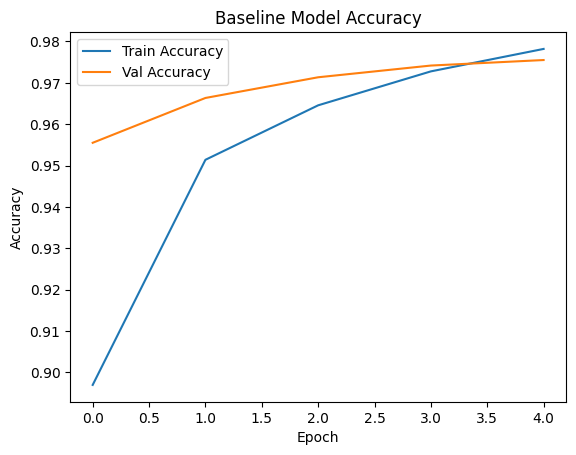

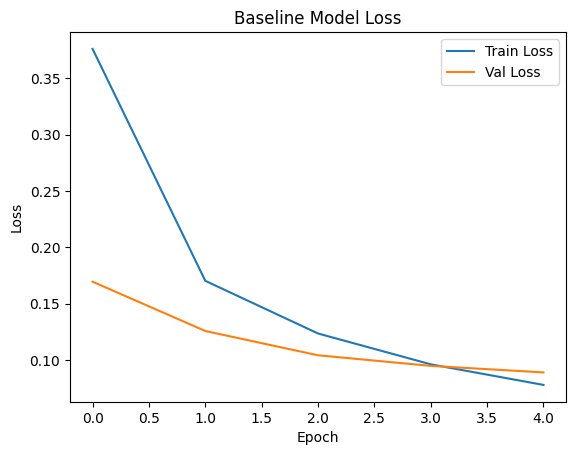

In [10]:
#training and validation accuracy
plt.figure()
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Baseline Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

#training and validation loss
plt.figure()
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Baseline Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [11]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(10, activation='softmax')
])

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 5408)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │        54,090 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 54,410 (212.54 KB)

 Trainable params: 54,410 (212.54 KB)

 Non-trainable params: 0 (0.00 B)

In [12]:
cnn_model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

cnn_model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

In [13]:
cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [14]:
cnn_history = cnn_model.fit(
    x_train, y_train,
    epochs=10,
    batch_size=128,
    validation_split=0.1,
    verbose=2
    )

Epoch 1/10
422/422 - 8s - 18ms/step - accuracy: 0.9393 - loss: 0.2114 - val_accuracy: 0.9843 - val_loss: 0.0597
Epoch 2/10
422/422 - 2s - 4ms/step - accuracy: 0.9822 - loss: 0.0583 - val_accuracy: 0.9833 - val_loss: 0.0561
Epoch 3/10
422/422 - 2s - 6ms/step - accuracy: 0.9869 - loss: 0.0406 - val_accuracy: 0.9878 - val_loss: 0.0455
Epoch 4/10
422/422 - 2s - 4ms/step - accuracy: 0.9900 - loss: 0.0308 - val_accuracy: 0.9900 - val_loss: 0.0354
Epoch 5/10
422/422 - 3s - 6ms/step - accuracy: 0.9926 - loss: 0.0225 - val_accuracy: 0.9892 - val_loss: 0.0379
Epoch 6/10
422/422 - 3s - 6ms/step - accuracy: 0.9947 - loss: 0.0172 - val_accuracy: 0.9892 - val_loss: 0.0399
Epoch 7/10
422/422 - 2s - 6ms/step - accuracy: 0.9954 - loss: 0.0147 - val_accuracy: 0.9895 - val_loss: 0.0416
Epoch 8/10
422/422 - 3s - 6ms/step - accuracy: 0.9959 - loss: 0.0124 - val_accuracy: 0.9910 - val_loss: 0.0351
Epoch 9/10
422/422 - 2s - 4ms/step - accuracy: 0.9966 - loss: 0.0096 - val_accuracy: 0.9920 - val_loss: 0.0345


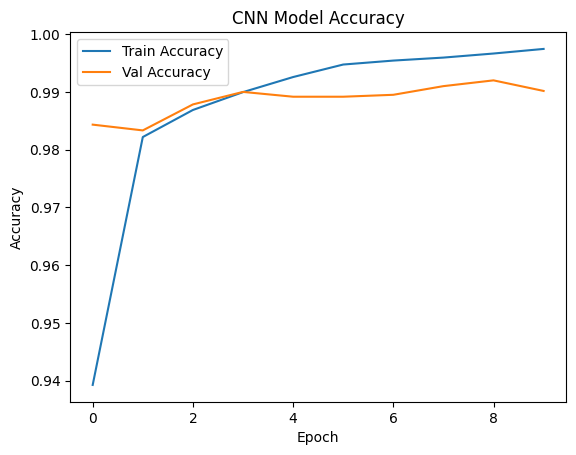

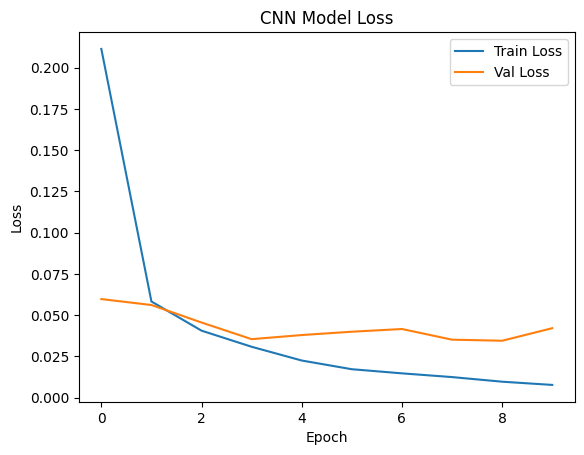

In [15]:
#CNN training and validation accuracy
plt.figure()
plt.plot(cnn_history.history['accuracy'], label='Train Accuracy')
plt.plot(cnn_history.history['val_accuracy'], label='Val Accuracy')
plt.title('CNN Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

#CNN training and validation loss
plt.figure()
plt.plot(cnn_history.history['loss'], label='Train Loss')
plt.plot(cnn_history.history['val_loss'], label='Val Loss')
plt.title('CNN Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [16]:
from tensorflow.keras.layers import BatchNormalization, Dropout


In [17]:
regularized_model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    Flatten(),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),

    Dense(10, activation='softmax')
])

regularized_model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 26, 26, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 11, 11, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,930 (882.54 KB)

 Trainable params: 225,482 (880.79 KB)

 Non-trainable params: 448 (1.75 KB)

In [18]:
regularized_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [19]:
regularized_history = regularized_model.fit(
    x_train, y_train,
    epochs=12,
    batch_size=128,
    validation_split=0.1,
    verbose=2
)

Epoch 1/12
422/422 - 15s - 35ms/step - accuracy: 0.9173 - loss: 0.2702 - val_accuracy: 0.6568 - val_loss: 0.9408
Epoch 2/12
422/422 - 10s - 24ms/step - accuracy: 0.9713 - loss: 0.0933 - val_accuracy: 0.9872 - val_loss: 0.0458
Epoch 3/12
422/422 - 2s - 5ms/step - accuracy: 0.9776 - loss: 0.0725 - val_accuracy: 0.9890 - val_loss: 0.0361
Epoch 4/12
422/422 - 3s - 6ms/step - accuracy: 0.9817 - loss: 0.0614 - val_accuracy: 0.9898 - val_loss: 0.0353
Epoch 5/12
422/422 - 2s - 5ms/step - accuracy: 0.9831 - loss: 0.0551 - val_accuracy: 0.9890 - val_loss: 0.0378
Epoch 6/12
422/422 - 3s - 7ms/step - accuracy: 0.9846 - loss: 0.0488 - val_accuracy: 0.9920 - val_loss: 0.0263
Epoch 7/12
422/422 - 2s - 5ms/step - accuracy: 0.9863 - loss: 0.0426 - val_accuracy: 0.9915 - val_loss: 0.0325
Epoch 8/12
422/422 - 2s - 5ms/step - accuracy: 0.9869 - loss: 0.0418 - val_accuracy: 0.9905 - val_loss: 0.0335
Epoch 9/12
422/422 - 3s - 6ms/step - accuracy: 0.9888 - loss: 0.0353 - val_accuracy: 0.9923 - val_loss: 0.02

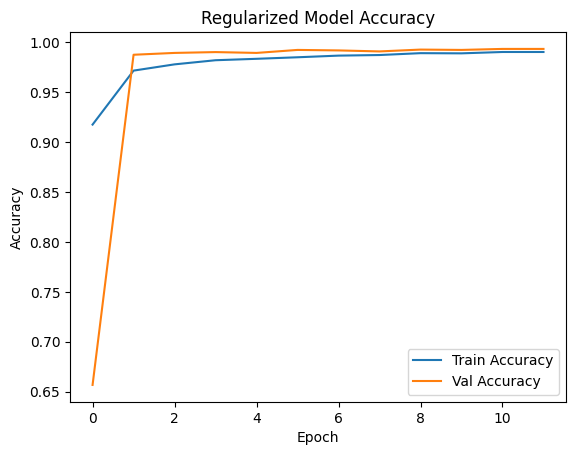

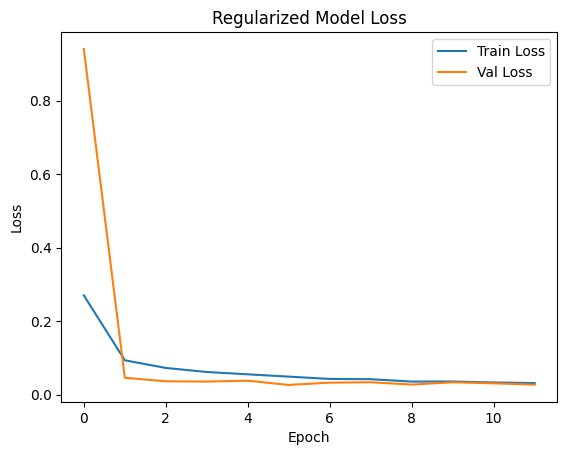

In [20]:
#accuracy after regularization
plt.figure()
plt.plot(regularized_history.history['accuracy'], label='Train Accuracy')
plt.plot(regularized_history.history['val_accuracy'], label='Val Accuracy')
plt.title('Regularized Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

#loss after regularization
plt.figure()
plt.plot(regularized_history.history['loss'], label='Train Loss')
plt.plot(regularized_history.history['val_loss'], label='Val Loss')
plt.title('Regularized Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step


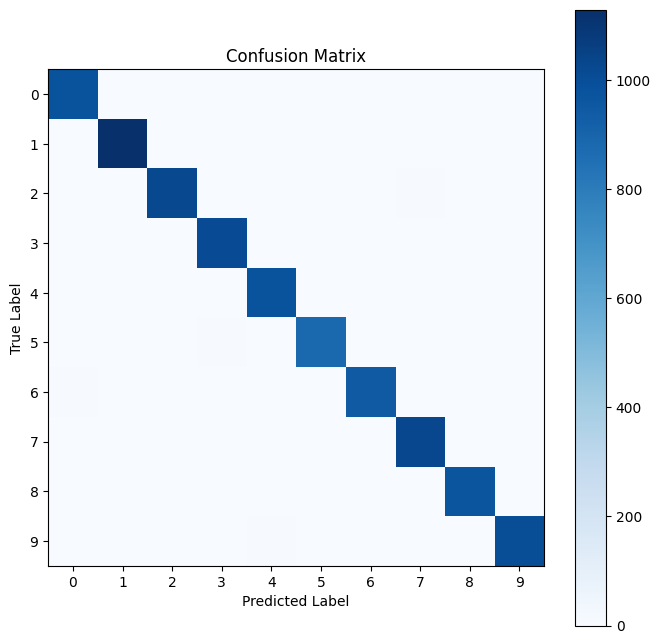

In [21]:
#confusion matrix
from sklearn.metrics import confusion_matrix
import numpy as np

y_pred = np.argmax(regularized_model.predict(x_test), axis=1)
y_true = np.argmax(y_test, axis=1)

cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(8,8))
plt.imshow(cm, interpolation='nearest', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label"); plt.ylabel("True Label")
plt.xticks(range(10)); plt.yticks(range(10))
plt.colorbar()
plt.show()

In [22]:
from sklearn.metrics import classification_report
print(classification_report(y_true, y_pred, digits=4))

              precision    recall  f1-score   support

           0     0.9899    0.9969    0.9934       980
           1     0.9965    0.9947    0.9956      1135
           2     0.9942    0.9913    0.9927      1032
           3     0.9892    0.9960    0.9926      1010
           4     0.9929    0.9969    0.9949       982
           5     0.9943    0.9854    0.9899       892
           6     0.9968    0.9885    0.9927       958
           7     0.9884    0.9961    0.9922      1028
           8     0.9969    0.9949    0.9959       974
           9     0.9930    0.9901    0.9916      1009

    accuracy                         0.9932     10000
   macro avg     0.9932    0.9931    0.9931     10000
weighted avg     0.9932    0.9932    0.9932     10000



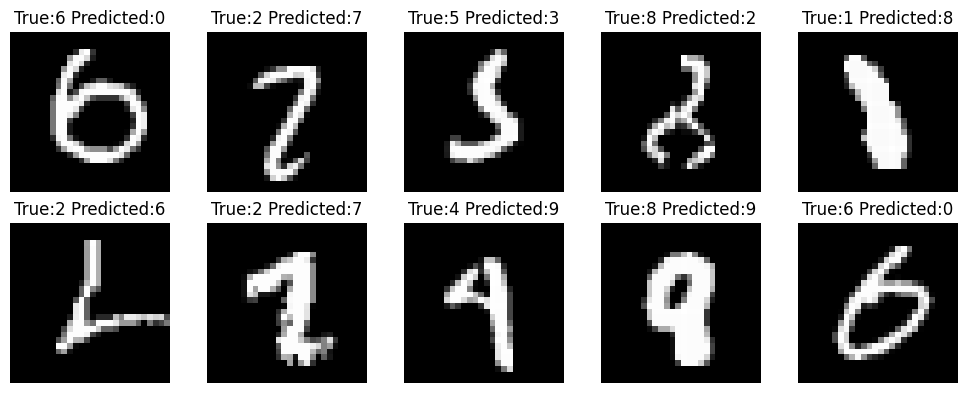

In [23]:
wrong_indices = np.where(y_pred != y_true)[0]
plt.figure(figsize=(10,4))
for i, idx in enumerate(wrong_indices[:10]):
    plt.subplot(2,5,i+1)
    plt.imshow(x_test[idx].reshape(28,28), cmap='gray')
    plt.title(f"True:{y_true[idx]} Predicted:{y_pred[idx]}")
    plt.axis('off')
plt.tight_layout(); plt.show()